In [294]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras import regularizers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical

In [295]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
%cd /content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija

/content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija


In [297]:
def load_data():
  train_data = pd.read_csv('../pretprocesiranje/train_data.csv')
  test_data = pd.read_csv('../pretprocesiranje/test_data.csv')
  X_train = train_data.iloc[:, :-1].copy()
  y_train = train_data.iloc[:, -1:].copy()
  X_test = test_data.iloc[:, :-1].copy()
  y_test = test_data.iloc[:, -1:].copy()

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

  X_train = np.array(X_train)
  y_train = np.array(y_train)
  X_val = np.array(X_val)
  y_val = np.array(y_val)
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  return X_train, X_val, y_train, y_val, X_test, y_test

In [298]:
def create_and_describe(inputs, outputs):
  model = Model(inputs=inputs, outputs=outputs)

  # ovi parametri ostaju isti
  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
  )

  model.summary()

  return model

In [299]:
def model_fit(X_train, y_train, X_test, y_test, batch_size, epochs, model):

  losses = []
  accuracies = []
  val_losses = []
  val_accuracies = []

  history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
  )
  losses.extend(history.history['loss'])
  accuracies.extend(history.history['accuracy'])
  val_losses.extend(history.history['val_loss'])
  val_accuracies.extend(history.history['val_accuracy'])

  return losses, accuracies, val_losses, val_accuracies

In [300]:
def plot_metrics(losses, accuracies, val_losses, val_accuracies):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  #losses
  ax1.plot(losses, label='Training Loss')
  ax1.plot(val_losses, label='Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()

  #accuracies
  ax2.plot(accuracies, label='Training Accuracy')
  ax2.plot(val_accuracies, label='Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()

  plt.tight_layout()
  plt.show()

In [301]:
def baseline_model(size, batch_size, epochs):
  input_dim = X_train.shape[1]
  inputs = Input(shape=(input_dim,), name="komentari")
  x = Dense(size, activation='relu', name="prvi_sloj")(inputs)
  outputs = Dense(3, activation='softmax', name="predikcije")(x)

  baseline_model = create_and_describe(inputs=inputs, outputs=outputs)

  losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_test, y_test, batch_size=batch_size, epochs=epochs, model=baseline_model)

  all_losses.append(losses)
  all_accuracies.append(accuracies)
  all_val_losses.append(val_losses)
  all_val_accuracies.append(val_accuracies)

In [302]:
def plot_batch():
  plt.figure(figsize=(10, 8))

  batch_sizes = [32, 64, 128]
  # training loss
  plt.subplot(2, 2, 1)
  for i in range(len(batch_sizes)):
      plt.plot(all_losses[i], label=f'Training - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss')

  # training accuracy
  plt.subplot(2, 2, 2)
  for i in range(len(batch_sizes)):
      plt.plot(all_accuracies[i], label=f'Training - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.legend()

  # validation loss
  plt.subplot(2, 2, 3)
  for i in range(len(batch_sizes)):
      plt.plot(all_val_losses[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Validation Loss')
  plt.legend()

  # validation accuracy
  plt.subplot(2, 2, 4)
  for i in range(len(batch_sizes)):
      plt.plot(all_val_accuracies[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Validation Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [303]:
X_train, X_val, y_train, y_val, X_test, y_test = load_data()

In [304]:
compare_loss = []
compare_val_loss = []
compare_accuracy = []
compare_val_accuracy = []

#**Multilayer Perceptron**

#Baseline Model i izbor batch size hiperparametra

In [305]:
all_losses = []
all_accuracies = []
all_val_losses = []
all_val_accuracies = []

In [306]:
baseline_model(size=64, batch_size=32, epochs=10)

Model: "model_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
213/213 [==============================] - 2s 7ms/step - loss: 0.9814 - accuracy: 0.5392 - val_loss: 0.8015 - val_accuracy: 0.7138
Epoch 2/10
213/213 [==============================] - 1s 6ms/step - loss: 0.6009 - accuracy: 0.7897 - val_loss: 0.6350 - val_accuracy: 0.7285
Epoch 3/10
213/213 [============

In [307]:
baseline_model(size=64, batch_size=64, epochs=10)

Model: "model_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
107/107 [==============================] - 2s 15ms/step - loss: 1.0284 - accuracy: 0.4775 - val_loss: 0.9159 - val_accuracy: 0.6655
Epoch 2/10
107/107 [==============================] - 1s 6ms/step - loss: 0.7459 - accuracy: 0.7607 - val_loss: 0.6990 - val_accuracy: 0.7362
Epoch 3/10
107/107 [===========

In [308]:
baseline_model(size=128, batch_size=32, epochs=10)

Model: "model_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 128)               1024128   
                                                                 
 predikcije (Dense)          (None, 3)                 387       
                                                                 
Total params: 1,024,515
Trainable params: 1,024,515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
213/213 [==============================] - 2s 6ms/step - loss: 0.9409 - accuracy: 0.5585 - val_loss: 0.7188 - val_accuracy: 0.7126
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 0.5215 - accuracy: 0.8066 - val_loss: 0.6217 - val_accuracy: 0.7297
Epoch 3/10
213/213 [========

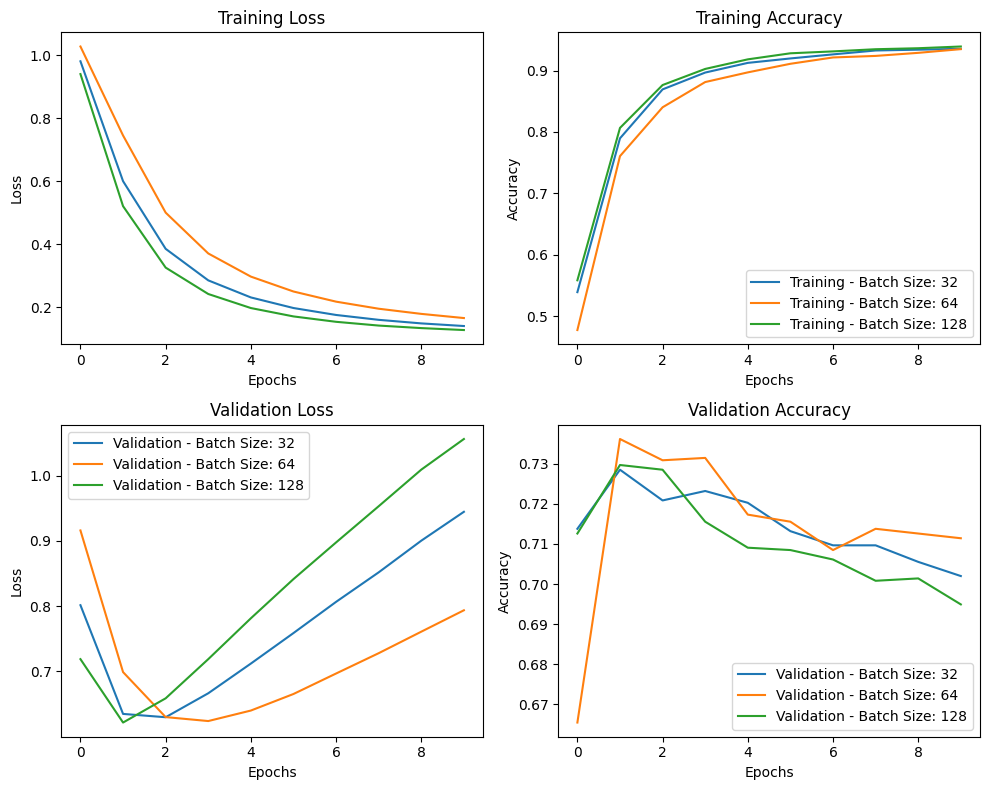

In [309]:
plot_batch()

overfiting u sva 3 slucaja lmao, u proseku mozda najbolje za batch=64 mozda bi vec posle 5 epohe se bas prilagodi

In [310]:
compare_loss.append(all_losses[1][-1])
compare_val_loss.append(all_val_losses[1][-1])
compare_accuracy.append(all_accuracies[1][-1])
compare_val_accuracy.append(all_val_accuracies[1][-1])

#Regularizacija smanjenjem broja neurona

In [311]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(32, activation='relu', name="prvi_sloj")(inputs)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

reg_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 32)                256032    
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 256,131
Trainable params: 256,131
Non-trainable params: 0
_________________________________________________________________


In [312]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=reg_model)

Epoch 1/10
107/107 [==============================] - 2s 8ms/step - loss: 1.0506 - accuracy: 0.4476 - val_loss: 0.9801 - val_accuracy: 0.5271
Epoch 2/10
107/107 [==============================] - 0s 5ms/step - loss: 0.8597 - accuracy: 0.6692 - val_loss: 0.8071 - val_accuracy: 0.7032
Epoch 3/10
107/107 [==============================] - 1s 5ms/step - loss: 0.6343 - accuracy: 0.8100 - val_loss: 0.6888 - val_accuracy: 0.7320
Epoch 4/10
107/107 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.8527 - val_loss: 0.6397 - val_accuracy: 0.7279
Epoch 5/10
107/107 [==============================] - 0s 4ms/step - loss: 0.3840 - accuracy: 0.8817 - val_loss: 0.6263 - val_accuracy: 0.7250
Epoch 6/10
107/107 [==============================] - 0s 5ms/step - loss: 0.3214 - accuracy: 0.8985 - val_loss: 0.6317 - val_accuracy: 0.7273
Epoch 7/10
107/107 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.9057 - val_loss: 0.6451 - val_accuracy: 0.7220
Epoch 

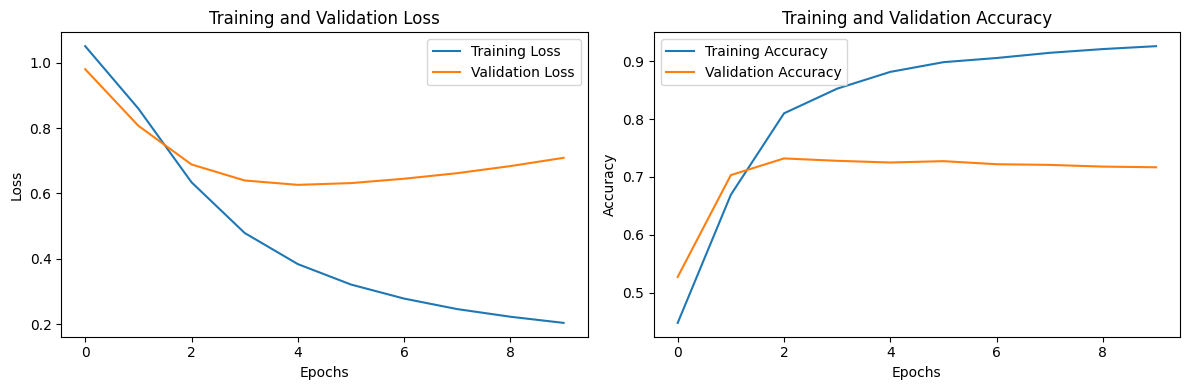

In [313]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [314]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

jos uvek ima preprilagodjavanja, val se malo smirio, loss i dalje raste posle 5 epohe

#Deep network

In [315]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj")(inputs)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dense(32, activation='relu', name="treci_sloj")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

dp_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 drugi_sloj (Dense)          (None, 32)                2080      
                                                                 
 treci_sloj (Dense)          (None, 32)                1056      
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 515,299
Trainable params: 515,299
Non-trainable params: 0
_________________________________________________________________


In [316]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=dp_model)

Epoch 1/10
107/107 [==============================] - 3s 11ms/step - loss: 0.9749 - accuracy: 0.5158 - val_loss: 0.7324 - val_accuracy: 0.6961
Epoch 2/10
107/107 [==============================] - 1s 6ms/step - loss: 0.5161 - accuracy: 0.7963 - val_loss: 0.6679 - val_accuracy: 0.7161
Epoch 3/10
107/107 [==============================] - 1s 5ms/step - loss: 0.2807 - accuracy: 0.8845 - val_loss: 0.7586 - val_accuracy: 0.7126
Epoch 4/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1960 - accuracy: 0.9203 - val_loss: 0.8583 - val_accuracy: 0.7114
Epoch 5/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1621 - accuracy: 0.9253 - val_loss: 0.9642 - val_accuracy: 0.7044
Epoch 6/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1403 - accuracy: 0.9367 - val_loss: 1.0253 - val_accuracy: 0.7026
Epoch 7/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1290 - accuracy: 0.9381 - val_loss: 1.0881 - val_accuracy: 0.6955
Epoch

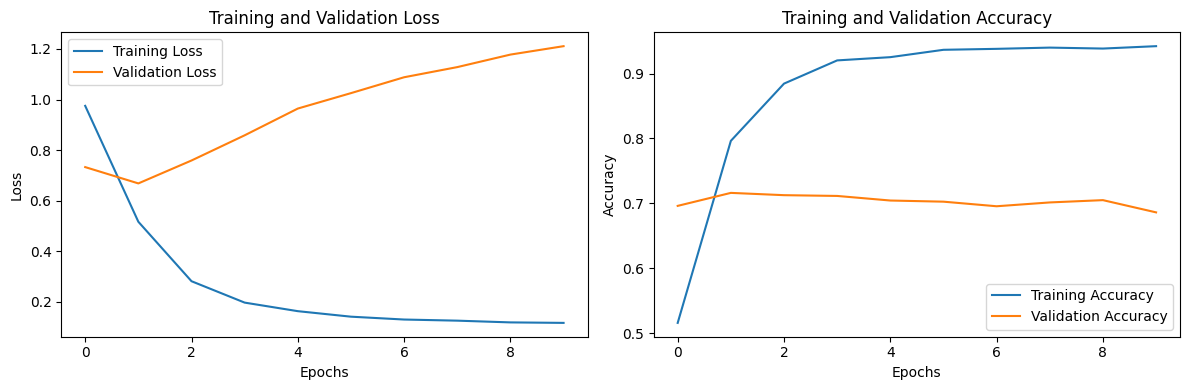

In [317]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

bas lose odmah se prilagodi podacima al to i ocekujemo

In [318]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#L2 regularizacija

In [319]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj", kernel_regularizer=regularizers.l2(0.01))(inputs)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

l2_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [320]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=l2_model)

Epoch 1/10
107/107 [==============================] - 2s 11ms/step - loss: 1.1776 - accuracy: 0.4186 - val_loss: 1.0696 - val_accuracy: 0.4252
Epoch 2/10
107/107 [==============================] - 1s 7ms/step - loss: 1.0689 - accuracy: 0.4515 - val_loss: 1.0607 - val_accuracy: 0.4723
Epoch 3/10
107/107 [==============================] - 1s 7ms/step - loss: 1.0600 - accuracy: 0.5255 - val_loss: 1.0507 - val_accuracy: 0.5365
Epoch 4/10
107/107 [==============================] - 1s 7ms/step - loss: 1.0478 - accuracy: 0.5710 - val_loss: 1.0402 - val_accuracy: 0.6213
Epoch 5/10
107/107 [==============================] - 1s 6ms/step - loss: 1.0348 - accuracy: 0.6259 - val_loss: 1.0271 - val_accuracy: 0.6549
Epoch 6/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0210 - accuracy: 0.6490 - val_loss: 1.0165 - val_accuracy: 0.6602
Epoch 7/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0055 - accuracy: 0.6751 - val_loss: 1.0050 - val_accuracy: 0.6649
Epoch

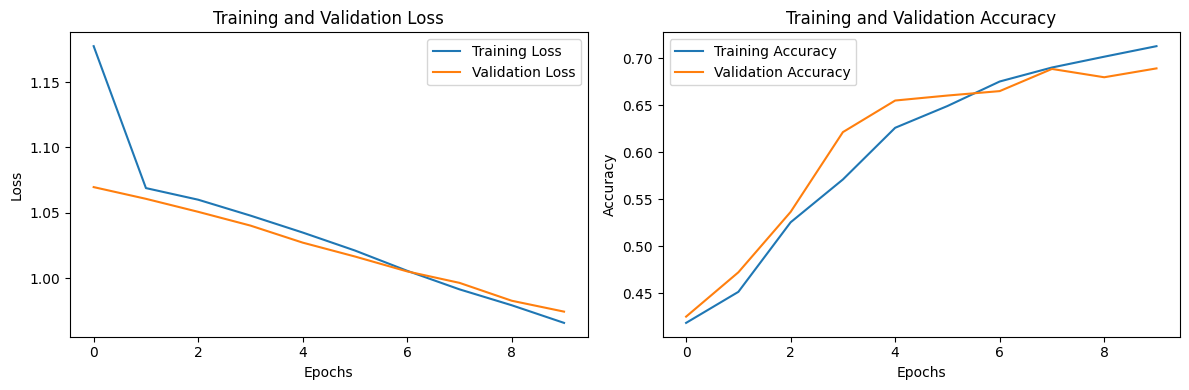

In [321]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

soldino bolje, mada je sad malo glup ne verujem da ce tacnost nastaviti mnogo da raste


In [322]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#Dropout regularizacija

In [323]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj")(inputs)
x = Dropout(0.5, name="dropout1")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

dropout_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 dropout1 (Dropout)          (None, 64)                0         
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [324]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=dropout_model)

Epoch 1/10
107/107 [==============================] - 2s 8ms/step - loss: 1.0575 - accuracy: 0.4349 - val_loss: 0.9924 - val_accuracy: 0.5389
Epoch 2/10
107/107 [==============================] - 1s 5ms/step - loss: 0.8834 - accuracy: 0.6576 - val_loss: 0.8059 - val_accuracy: 0.7097
Epoch 3/10
107/107 [==============================] - 1s 7ms/step - loss: 0.6670 - accuracy: 0.7773 - val_loss: 0.6838 - val_accuracy: 0.7267
Epoch 4/10
107/107 [==============================] - 1s 7ms/step - loss: 0.5191 - accuracy: 0.8250 - val_loss: 0.6344 - val_accuracy: 0.7314
Epoch 5/10
107/107 [==============================] - 1s 7ms/step - loss: 0.4302 - accuracy: 0.8513 - val_loss: 0.6192 - val_accuracy: 0.7314
Epoch 6/10
107/107 [==============================] - 1s 7ms/step - loss: 0.3660 - accuracy: 0.8767 - val_loss: 0.6214 - val_accuracy: 0.7314
Epoch 7/10
107/107 [==============================] - 1s 7ms/step - loss: 0.3191 - accuracy: 0.8860 - val_loss: 0.6343 - val_accuracy: 0.7185
Epoch 

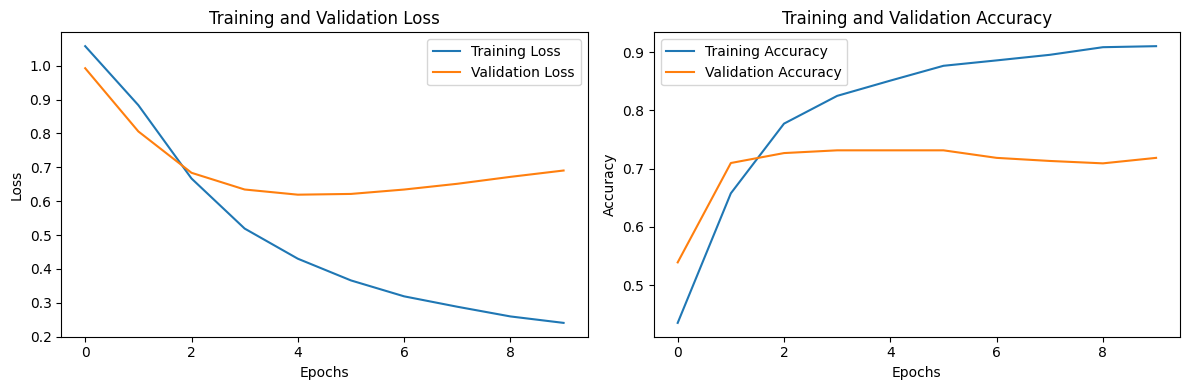

In [325]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [326]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#l2 + dropout :) 

In [327]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj", kernel_regularizer=regularizers.l2(0.01))(inputs)
x = Dropout(0.5, name="dropout1")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

reg_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 dropout1 (Dropout)          (None, 64)                0         
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [328]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=reg_model)

Epoch 1/10
107/107 [==============================] - 2s 9ms/step - loss: 1.1839 - accuracy: 0.4159 - val_loss: 1.0764 - val_accuracy: 0.4187
Epoch 2/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0784 - accuracy: 0.4505 - val_loss: 1.0744 - val_accuracy: 0.4700
Epoch 3/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0773 - accuracy: 0.4931 - val_loss: 1.0721 - val_accuracy: 0.5777
Epoch 4/10
107/107 [==============================] - 0s 5ms/step - loss: 1.0709 - accuracy: 0.5489 - val_loss: 1.0655 - val_accuracy: 0.5878
Epoch 5/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0608 - accuracy: 0.5795 - val_loss: 1.0570 - val_accuracy: 0.6355
Epoch 6/10
107/107 [==============================] - 1s 6ms/step - loss: 1.0527 - accuracy: 0.6187 - val_loss: 1.0489 - val_accuracy: 0.6272
Epoch 7/10
107/107 [==============================] - 1s 7ms/step - loss: 1.0435 - accuracy: 0.6342 - val_loss: 1.0400 - val_accuracy: 0.6578
Epoch 

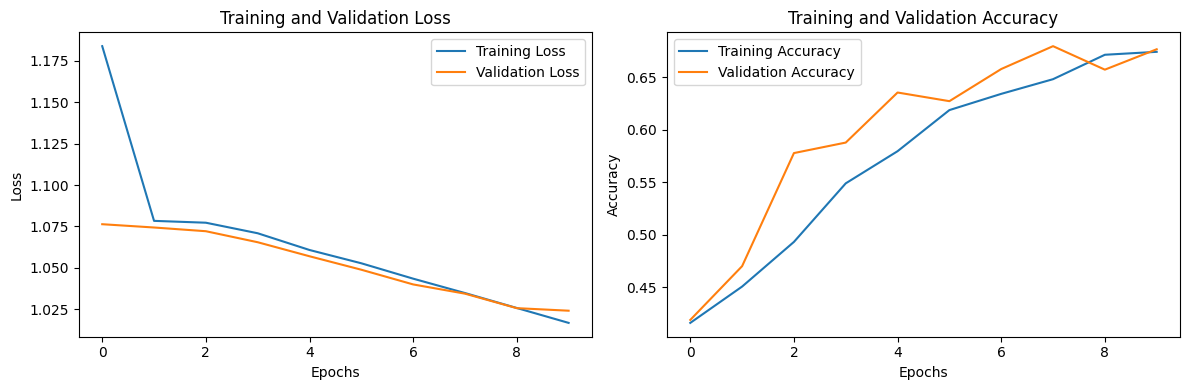

In [329]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [330]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

<Figure size 800x600 with 0 Axes>

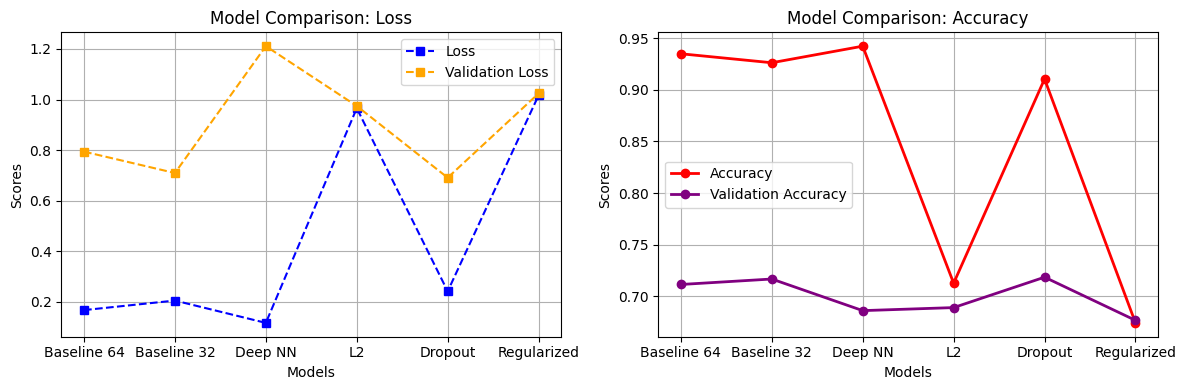

In [331]:
model_names = ['Baseline 64', 'Baseline 32', 'Deep NN', 'L2', 'Dropout', 'Regularized']
plt.figure(figsize=(8, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(model_names, compare_loss, marker='s', linestyle='--', color='blue', label='Loss')
ax1.plot(model_names, compare_val_loss, marker='s', linestyle='--', color='orange', label='Validation Loss')
ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
ax1.set_title('Model Comparison: Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(model_names, compare_accuracy, marker='o', linestyle='-', linewidth=2, color='red', label='Accuracy')
ax2.plot(model_names, compare_val_accuracy, marker='o', linestyle='-', linewidth=2, color='purple', label='Validation Accuracy')
ax2.set_xlabel('Models')
ax2.set_ylabel('Scores')
ax2.set_title('Model Comparison: Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

plt.show()

-------------------najbolja arhitektura-------------------

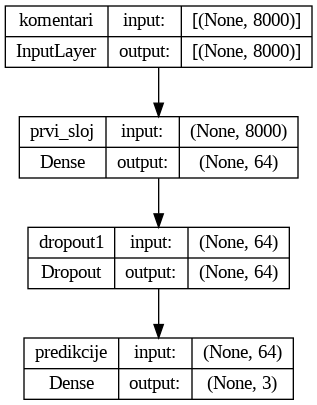

In [252]:
plot_model(dropout_model,show_shapes=True)

#Test skup

In [340]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(20, activation='relu', name="prvi_sloj")(inputs)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

final_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 20)                160020    
                                                                 
 dropout_26 (Dropout)        (None, 20)                0         
                                                                 
 predikcije (Dense)          (None, 3)                 63        
                                                                 
Total params: 160,083
Trainable params: 160,083
Non-trainable params: 0
_________________________________________________________________


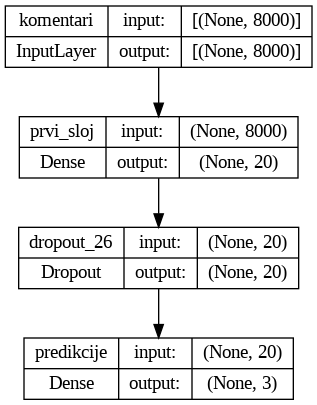

In [341]:
plot_model(final_model,show_shapes=True)

In [342]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=final_model)

Epoch 1/10
107/107 [==============================] - 2s 11ms/step - loss: 1.0718 - accuracy: 0.4203 - val_loss: 1.0376 - val_accuracy: 0.4340
Epoch 2/10
107/107 [==============================] - 1s 5ms/step - loss: 0.9880 - accuracy: 0.5193 - val_loss: 0.9481 - val_accuracy: 0.5824
Epoch 3/10
107/107 [==============================] - 0s 4ms/step - loss: 0.8641 - accuracy: 0.6732 - val_loss: 0.8444 - val_accuracy: 0.6837
Epoch 4/10
107/107 [==============================] - 1s 5ms/step - loss: 0.7457 - accuracy: 0.7390 - val_loss: 0.7621 - val_accuracy: 0.7150
Epoch 5/10
107/107 [==============================] - 1s 5ms/step - loss: 0.6513 - accuracy: 0.7800 - val_loss: 0.7066 - val_accuracy: 0.7267
Epoch 6/10
107/107 [==============================] - 1s 5ms/step - loss: 0.5837 - accuracy: 0.7963 - val_loss: 0.6698 - val_accuracy: 0.7326
Epoch 7/10
107/107 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.8237 - val_loss: 0.6489 - val_accuracy: 0.7297
Epoch

In [343]:
test_scores = final_model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

50/50 - 0s - loss: 0.4223 - accuracy: 0.8380 - 131ms/epoch - 3ms/step
Test loss: 0.4223187267780304
Test accuracy: 0.8379571437835693
